In [1]:
import gym
import numpy as np
import cv2
import wimblepong
import matplotlib.pyplot as plt

In [2]:
env = gym.make('WimblepongVisualSimpleAI-v0')

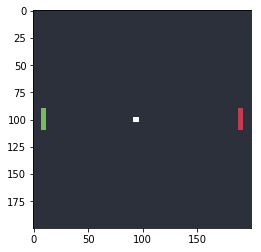

In [3]:
frame, rew1, done, info = env.step(0)
plt.imshow(frame);

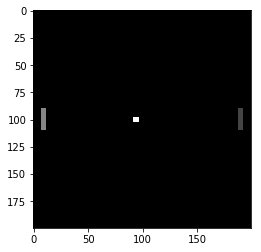

In [4]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
plt.imshow(frame, cmap='gray');

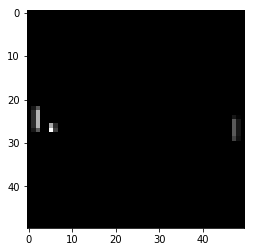

In [68]:
frame = cv2.resize(frame, (0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
plt.imshow(frame, cmap='gray');

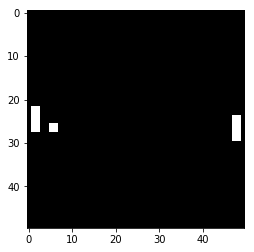

In [85]:
(thresh, frameth) = cv2.threshold(frame, 50, 255, cv2.THRESH_BINARY)
plt.imshow(frameth, cmap='gray');

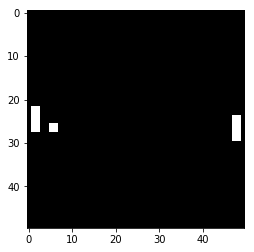

In [87]:
plt.imshow(frameth/255, cmap='gray');

In [91]:
(frameth/255).max(axis=0)

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.])

In [123]:
def prepro(frame):
    # make it gray
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # 25% downsampling
    frame = frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
    # thresholding to make everything black and white
    _, frame = cv2.threshold(frame, 50, 255, cv2.THRESH_BINARY)
    # 0-1 image
    frame = frame / 255
    return frame

In [124]:
frames = []
for i in range(4):
    frame, rew1, done, info = env.step(0)
    frame = prepro(frame)
    frames.append(frame)

In [142]:
np.stack(frames, axis=0).shape

(4, 50, 50)

In [131]:
from collections import deque

In [140]:
d = deque([], maxlen=4)

In [141]:
d.append(1)
d.append(2)
d.append(3)
d.append(4)
d.append(5)
d

deque([2, 3, 4, 5])